### Step 1: Understand data

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('C:/Users/Dell/Documents/Guide-to-EDA/insurance.csv')

In [6]:
# .head() returns the first 5 rows of the dataset. We can also use 
# df.sample(5) to get randomly select 5 rows or df.tail() to get last 5 rows.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# df.info() method returns information about the DataFrame including the index data type and columns, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# df.shape() returns a tuple that represents the dimensions of the data frame.
df.shape

(1338, 7)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
# df.describe() method generates descriptive statistics for us. 
# For numeric data, the result’s index will include 
# count, mean, std, min, max as well as lower, 50(median) and upper percentiles.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. 
# The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.
df.describe(include='O')
# We see that the most frequent value for sex is male and shown in the dataset 676 times.
# There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data.
# Most people are not smokers with a number of 1064 observations.

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [15]:
# unique values in discrete variable using .unique() method.
list(df.sex.unique())

['female', 'male']

# Data Cleaning

#### Missing Values

In [16]:
# When combining .isnull() method with .sum() we can sum up all the missing values for each variables.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df[df.duplicated(keep='first')]
# Dataset has only one duplicated observation.

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [19]:
# drop this row using the drop_duplicates() method.
df.drop_duplicates(keep='first',inplace=True)
# keep = ‘first’ is used to keep the first row of duplicated ones.
# inplace = True is used to change the data frame permanently.

# Data Visualization

## Charges

#### The distribution plot shows us how our variable is distributed.

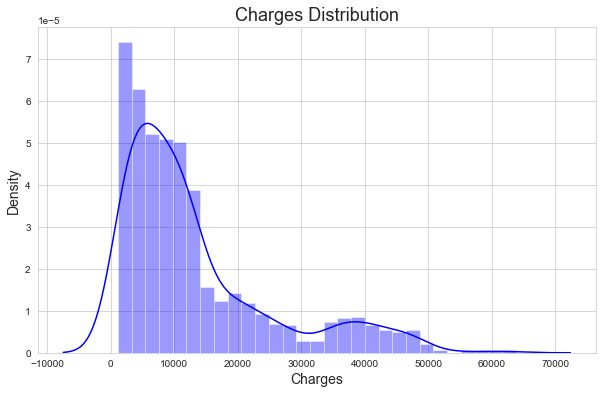

In [23]:
# sns.distplot() function. Displot stands for distribution plot and 
# shows us distribution and kernel density estimation by default.
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='b') # Displot stands for distribution plot and shows us distribution and kernel density estimation by default.
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()
# We see that our data looks like the right(positive) skewed. Most of the charges are between 0 – 10000 dollars.

### Age

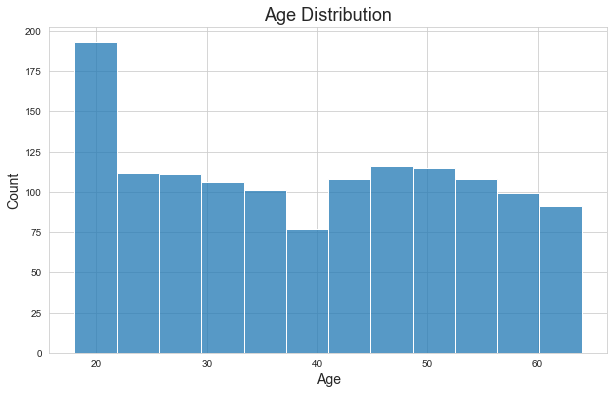

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

### BMI

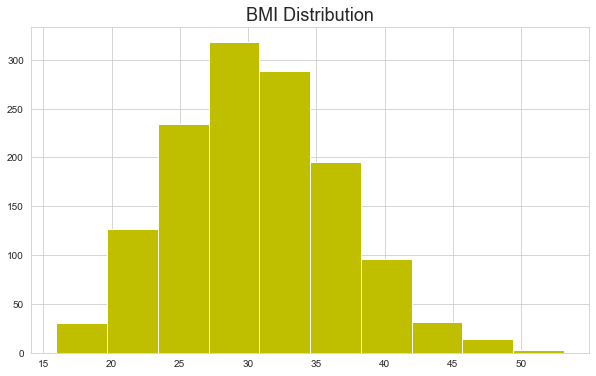

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()
# BMI of people seems like a normal distribution. That’s what we expected right? Most people have BMI between 27 -34 years old

### Boxplot

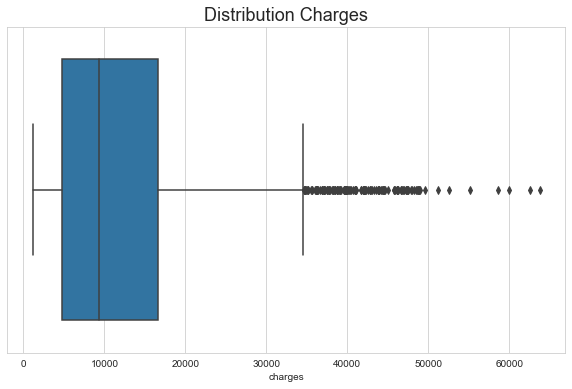

In [28]:
# A boxplot is a standardized way of displaying the dataset based on a five-number summary: 
# the minimum, the maximum, the sample median, and the first and third quartiles.
# It also helps us to detect outliers using IQR (Inter Quantile Range) method.
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()
# By using a boxplot, We can easily interpret our variable if it has outliers. Outliers can be easily removed from our dataset.

In [30]:
# A common way to remove outliers is to use IQR Method.
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [32]:
# After obtaining Inter Quantile Range, we can use the IQR method to see outliers or remove them from the dataset.
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]
# Now We can easily detect outliers with a boxplot or using python code. In this example.

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


# Univariate Analysis for Categorical Features

#### A bar chart is commonly used to visualize categorical features. We will use sns.countplot() method for sex, children, smoker and region variables.

### Gender

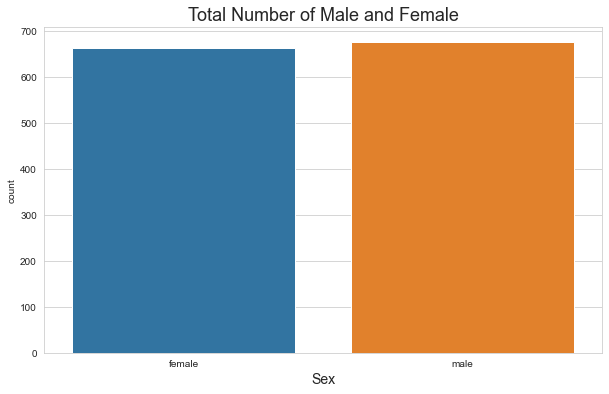

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()
# Female and Male customers have almost the same number within the variable.

### Children

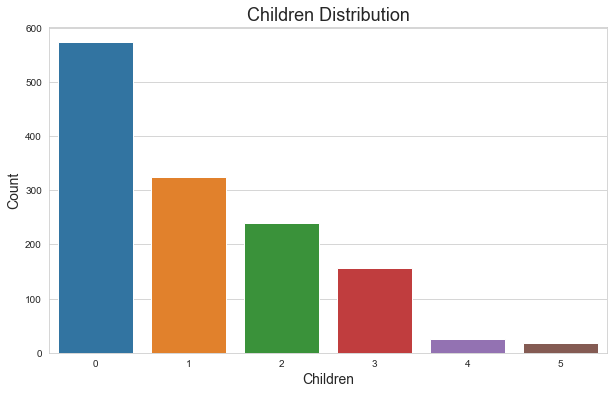

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(df.children)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()
# The majority of the people do not have any children.
# Few people have 4 and 5 children.

### Smoker

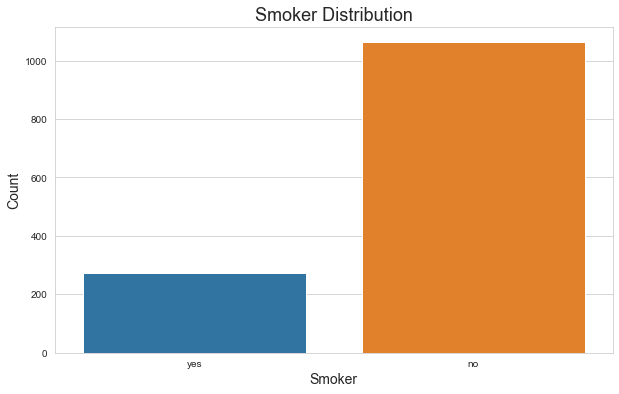

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(df.smoker)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()
# The number of non-smokers is almost 4 times more than smokers. 

In [39]:
# Using the value_counts method, we can easily see the number of each value within the variable.
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

### Region

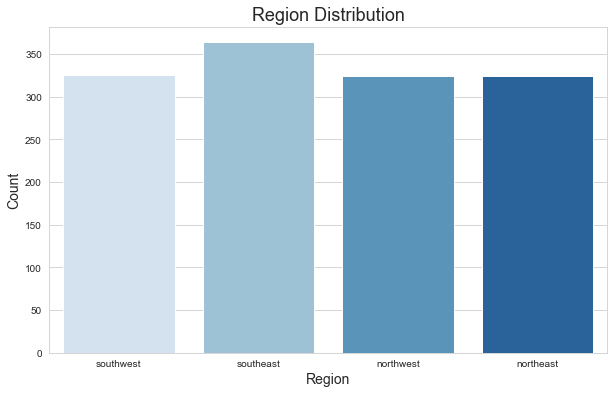

In [41]:
plt.figure(figsize = (10,6))
sns.countplot(df.region,palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()
# All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

## Bivariate Analysis

#### Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.
#### For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

### Age vs Charges

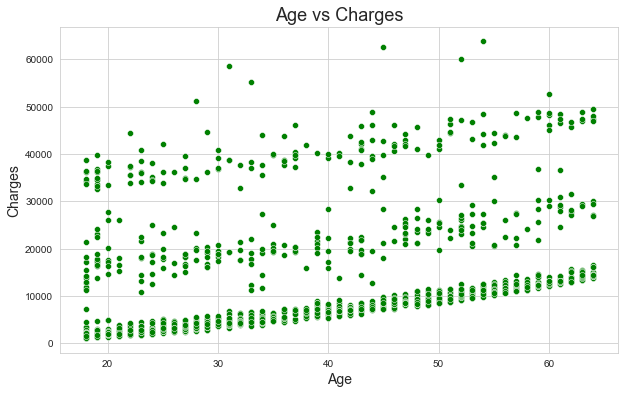

In [45]:
# A scatterplot is a type of data display that shows the relationship between two numerical variables.
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='g',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()
# We see that there is a weak positive relationship between age and charges values. 
# As age increases charges also slightly increase.

In [46]:
# .corr() method also shows us the relationship between the two variables.
print('Correlation between age and charges is : {}'.format(round(df.corr()['age']['charges'],3)))

Correlation between age and charges is : 0.298


### Smoker vs Charges

Text(0.5, 1.0, 'Smoker vs Charges')

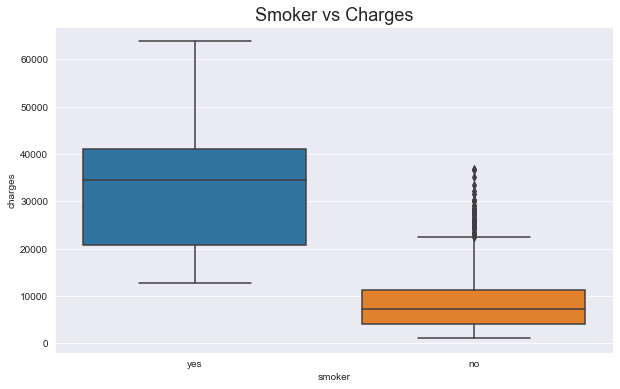

In [47]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18)
# The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.

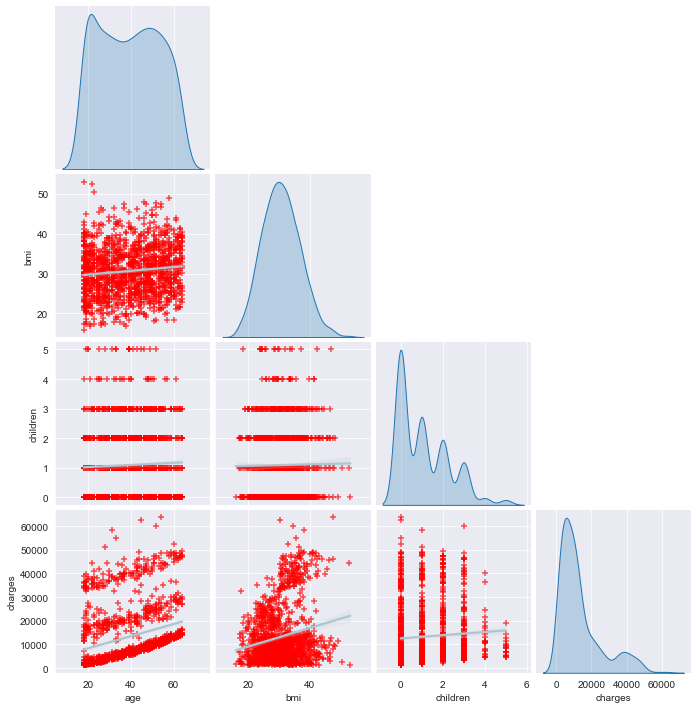

In [49]:
# Using Pairplot for Numerical Values
# Pair plot is another awesome method that shows us the relationship between two numerical values 
# as well as the distribution of each variable.
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 'color': 'red'}},
                 corner=True)

# Multivariate Analysis

### Correlation

#### Correlation is used to test relationships between quantitative variables or categorical variables. 
#### It’s a measure of how things are related.

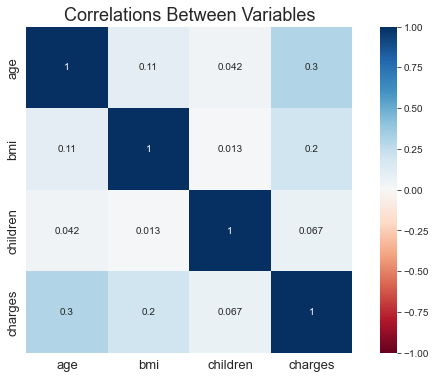

In [52]:
# We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. 
# .corr() method is used Pearson correlation by default.
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()
# The heatmap shows us there is a correlation between age and charges. 
# # As the age increases insurance charges also increase or vice versa.
# We can also see that there is a weak correlation between BMI and charges.
# There is almost no relationship between children and charges.